## Import required libraries

In [4]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid") 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

## Load the dataset

In [6]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [7]:
df.shape

(366, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [10]:
df['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [13]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [16]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [17]:
## There is no significance important of Day column
df = df.drop(columns =['day'] )

In [18]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [19]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [20]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [21]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [28]:
df['winddirection'].mode()[0]

20.0

In [30]:
## Handling missing values
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [31]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [34]:
df['rainfall'].unique()
df['rainfall'] = df['rainfall'].map({"yes":1, "no":0})

In [36]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


## Exploratory Data Analysis

In [38]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

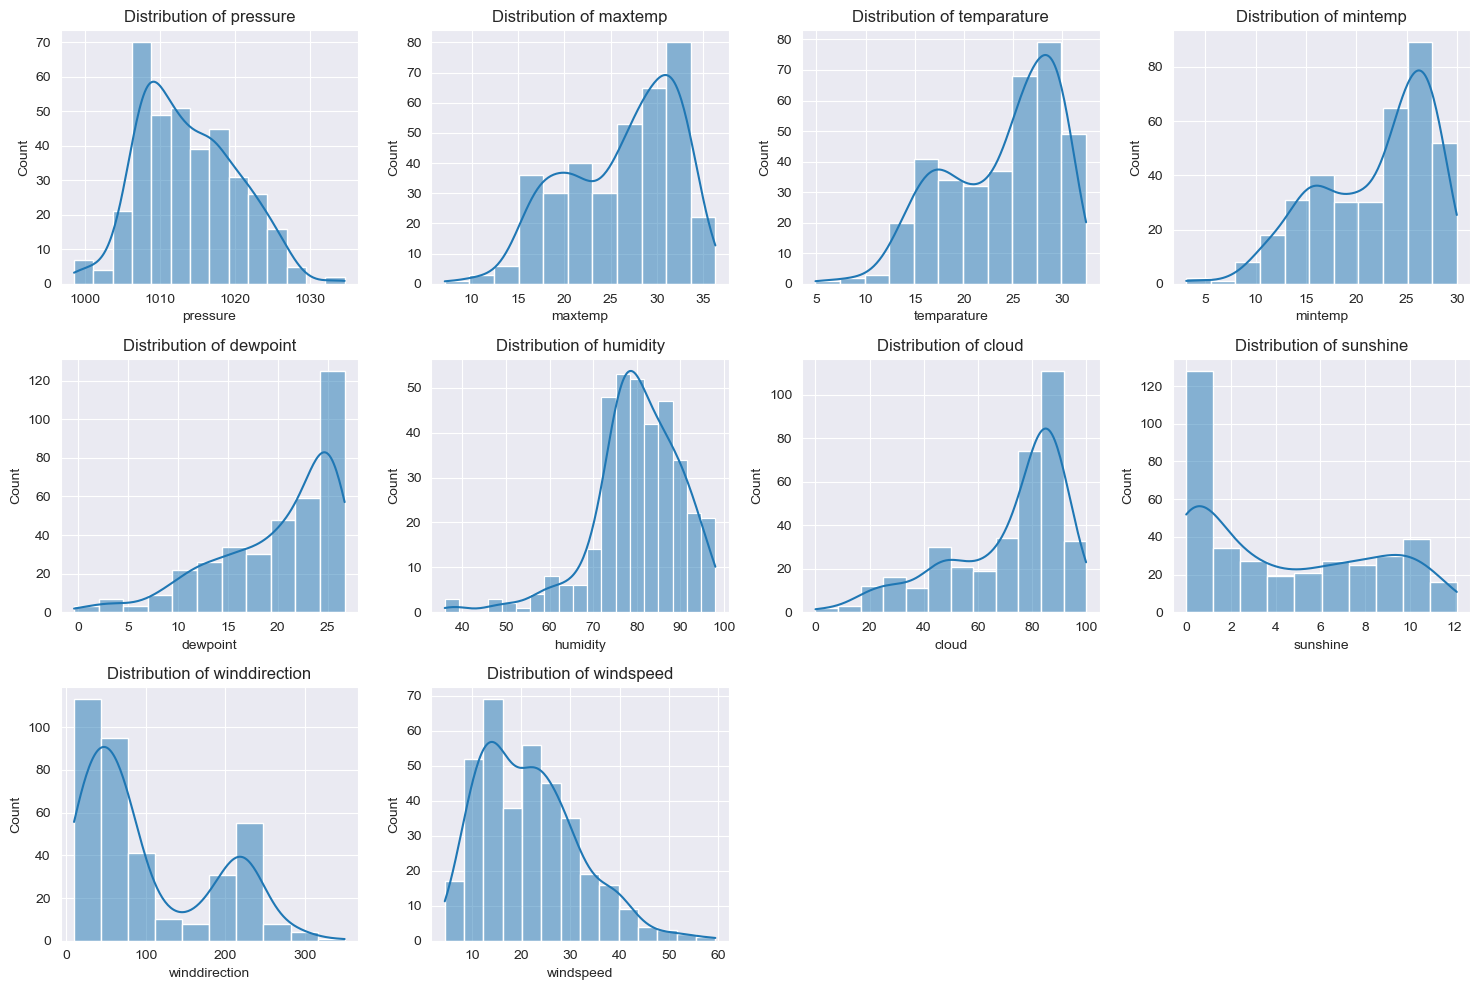

In [46]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud' , 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize=(15,10))
for i, column in enumerate(columns, 1):
    plt.subplot(3,4,i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

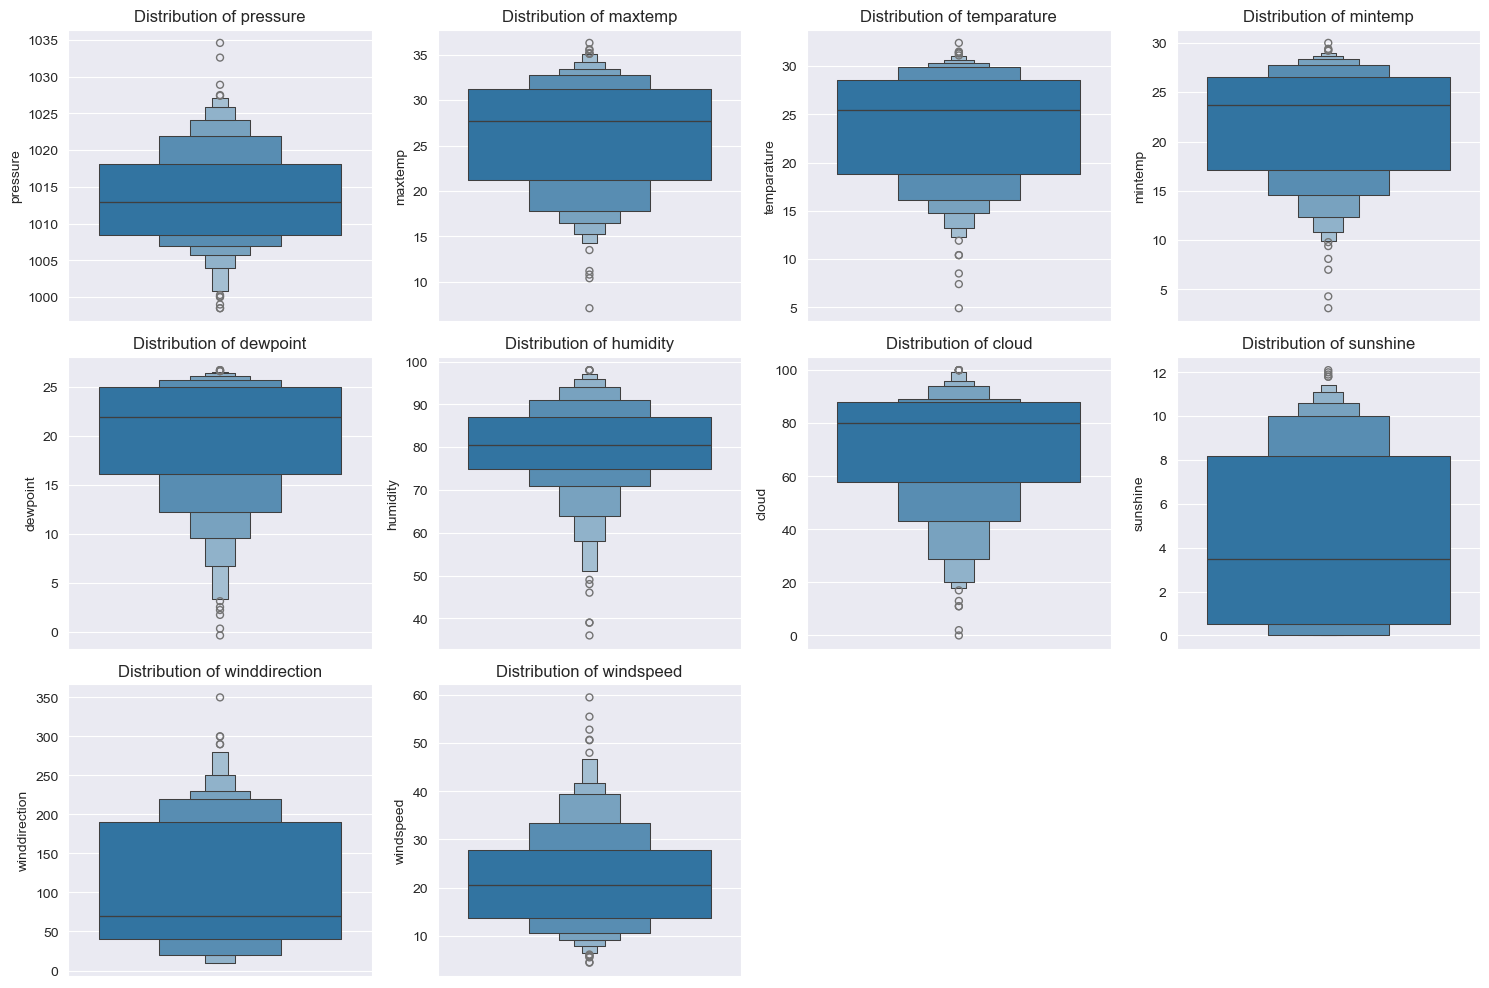

In [45]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud' , 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize=(15,10))
for i, column in enumerate(columns, 1):
    plt.subplot(3,4,i)
    sns.boxenplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

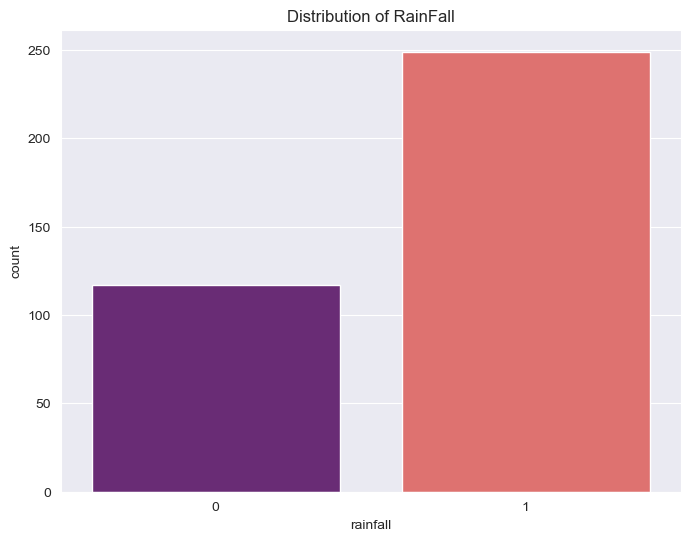

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x= df['rainfall'], data=df, palette='magma')
plt.title('Distribution of RainFall')
plt.show()

### Fetaure Engineering

In [55]:
corr = df.corr()
print(corr['rainfall'].sort_values(ascending=False))

rainfall         1.000000
cloud            0.625766
humidity         0.489623
windspeed        0.154193
dewpoint         0.139916
mintemp         -0.007697
winddirection   -0.015058
temparature     -0.037360
pressure        -0.089275
maxtemp         -0.101003
sunshine        -0.552519
Name: rainfall, dtype: float64


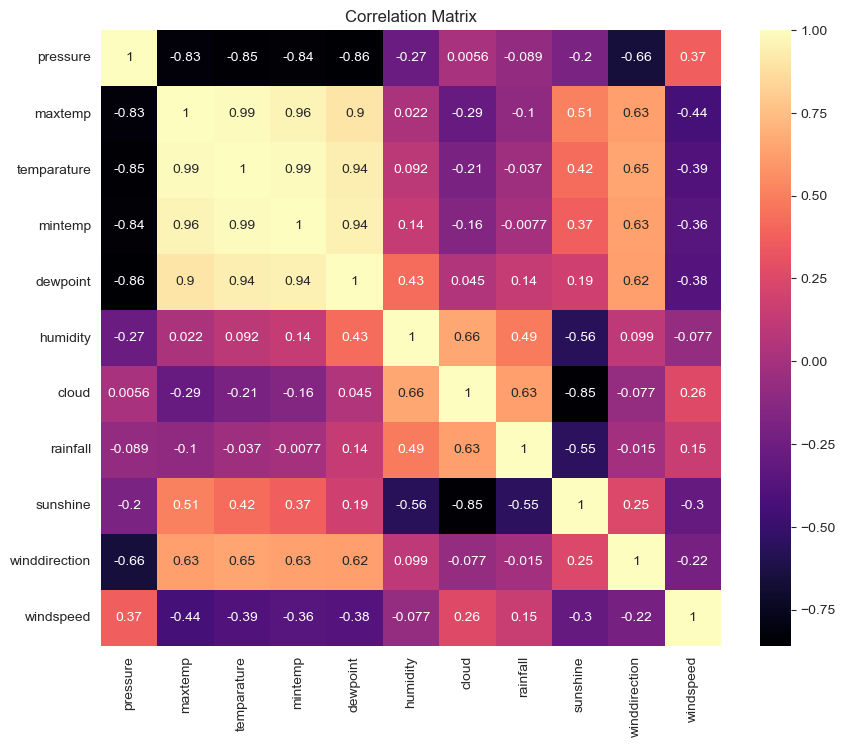

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title("Correlation Matrix")
plt.show()

In [52]:
## We will be using undersample technique to balance the dataset
from imblearn.under_sampling import RandomUnderSampler
# Separate features and target
X = df.drop('rainfall', axis=1)
y = df['rainfall']

rus = RandomUnderSampler(random_state=42)
X_resample, y_resample = rus.fit_resample(X, y)

y_resample.value_counts()

rainfall
0    117
1    117
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

In [58]:
model_results= {}

# Evaluate each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM' : SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    print(f"Accuracy Score {accuracy}")
    print(f"precision Score {precision}")
    print(f"Model Name: {name}")
    print("\n")

Accuracy Score 0.8723404255319149
precision Score 0.8846153846153846
Model Name: Logistic Regression


Accuracy Score 0.8085106382978723
precision Score 0.9047619047619048
Model Name: Random Forest


Accuracy Score 0.8085106382978723
precision Score 0.8695652173913043
Model Name: XGBoost


Accuracy Score 0.44680851063829785
precision Score 0.0
Model Name: SVM


Accuracy Score 0.723404255319149
precision Score 0.7407407407407407
Model Name: Decision Tree


Accuracy Score 0.851063829787234
precision Score 0.9130434782608695
Model Name: Gradient Boosting




In [68]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators" : [50 ,100, 200],
    "max_features" : ['sqrt', 'log2'],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [69]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [73]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7965860597439545


In [74]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=42)

In [75]:
y_pred = best_rf_model.predict(X_test)

classification report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.91      0.81      0.86        26

    accuracy                           0.85        47
   macro avg       0.85      0.86      0.85        47
weighted avg       0.86      0.85      0.85        47



Text(0.5, 1.0, 'Confusion Matrix')

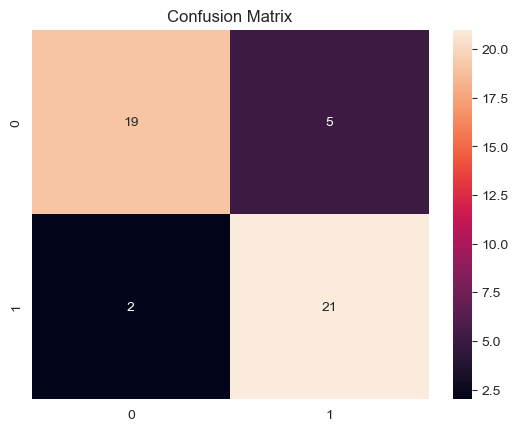

In [78]:
print(f'classification report:\n {classification_report(y_test,y_pred)}')
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")

In [79]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.
